In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# load dataset
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure', 
                'SkinThickness', 'DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [63]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [64]:
X.describe()

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,79.799479,31.992578,33.240885,120.894531,69.105469,20.536458,0.471876
std,3.369578,115.244002,7.884160,11.760232,31.972618,19.355807,15.952218,0.331329
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,0.000000,27.300000,24.000000,99.000000,62.000000,0.000000,0.243750
50%,3.000000,30.500000,32.000000,29.000000,117.000000,72.000000,23.000000,0.372500
75%,6.000000,127.250000,36.600000,41.000000,140.250000,80.000000,32.000000,0.626250
max,17.000000,846.000000,67.100000,81.000000,199.000000,122.000000,99.000000,2.420000


In [65]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


In [10]:
!pip install graphviz

In [11]:
!pip install pydotplus

In [68]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

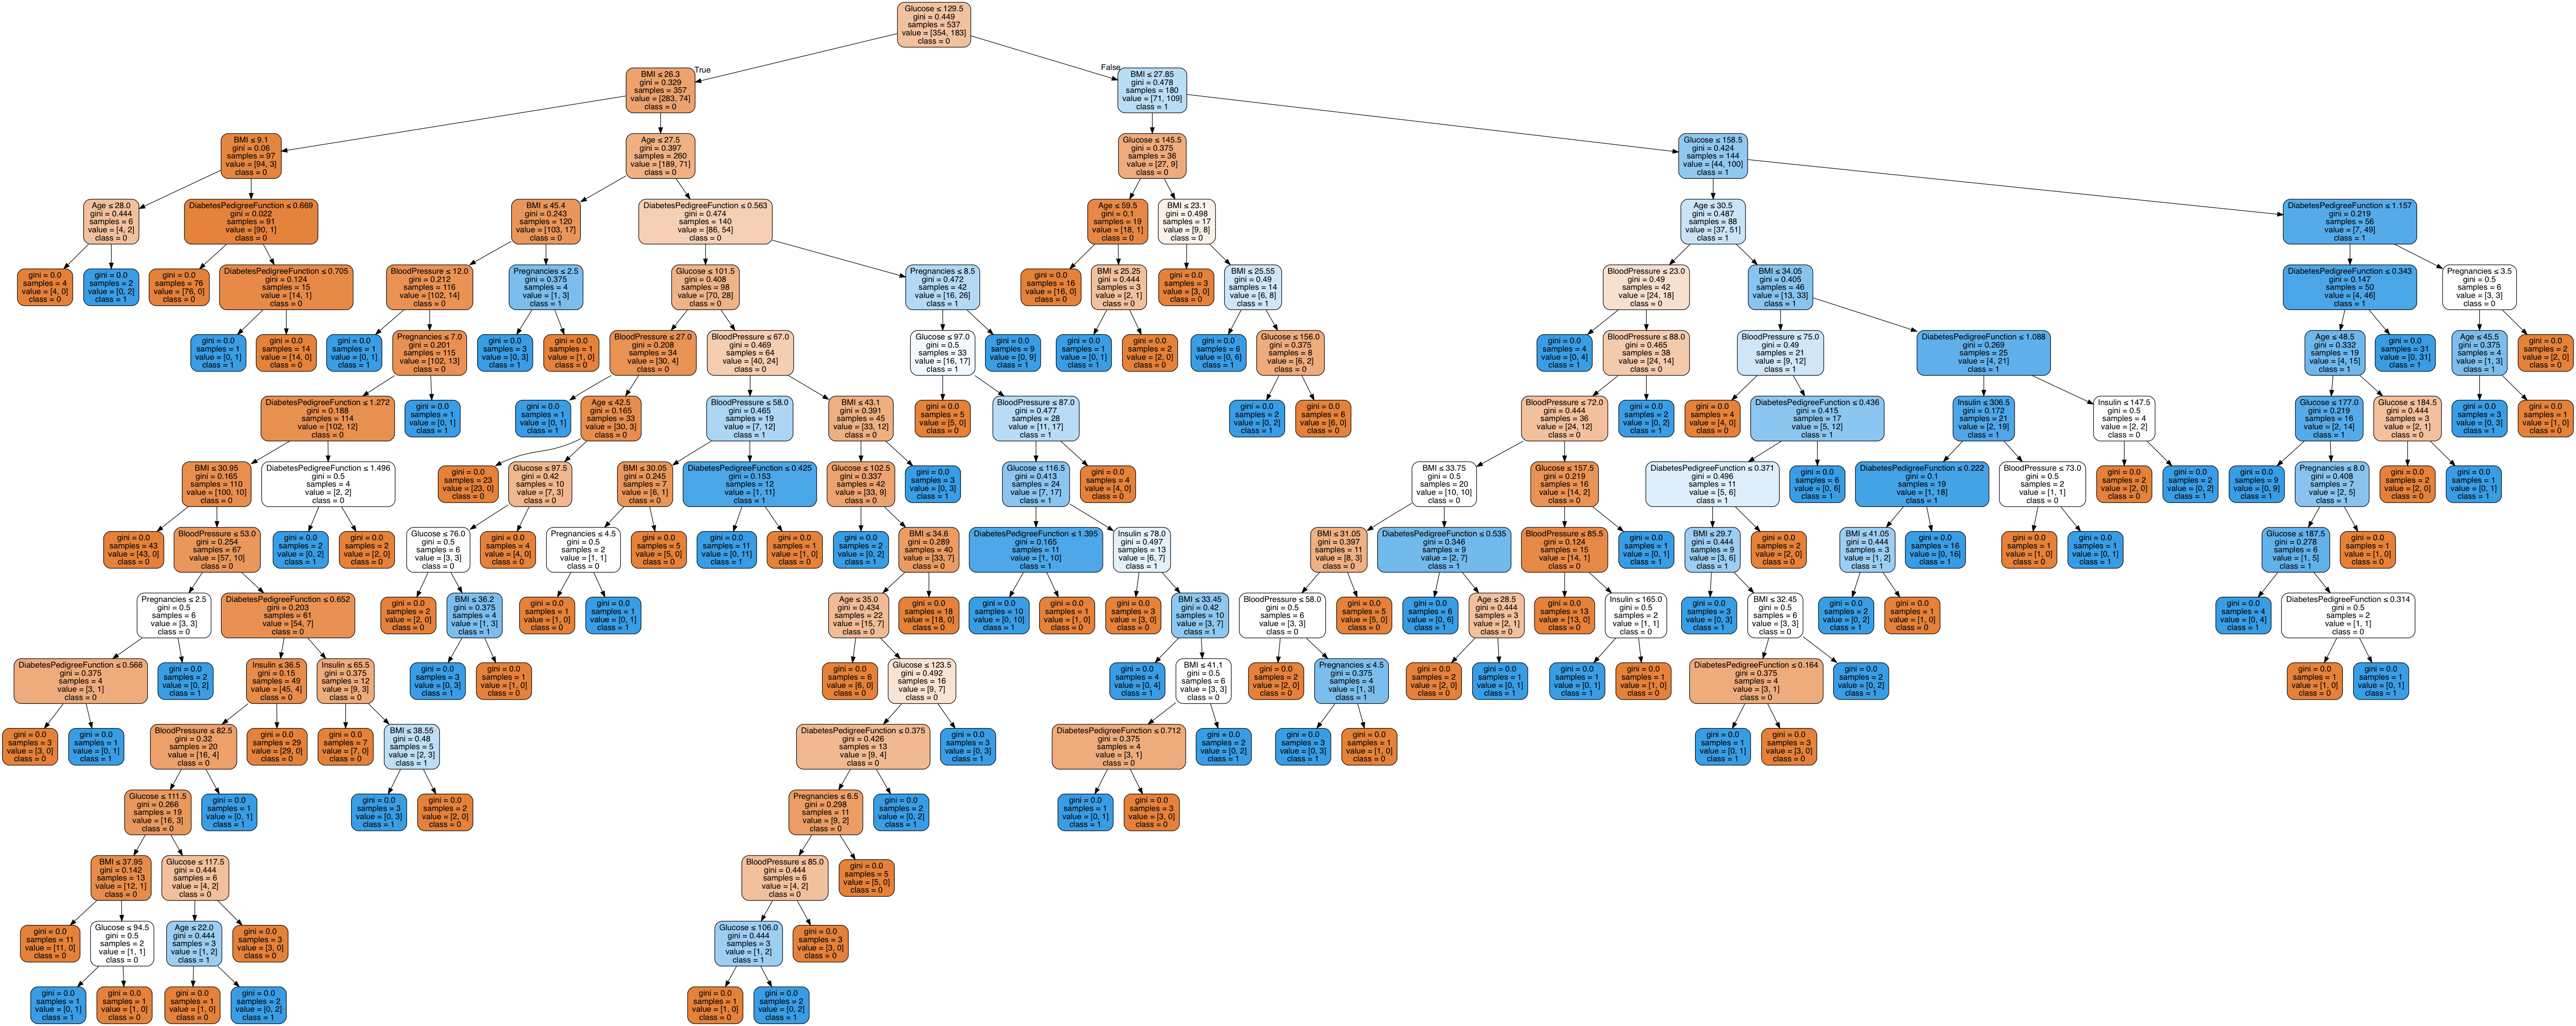

In [13]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [15]:
!pwd

/Users/manishanker.talusani/Desktop/Learnbay_sep19/jupyter_notebooks


In [69]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


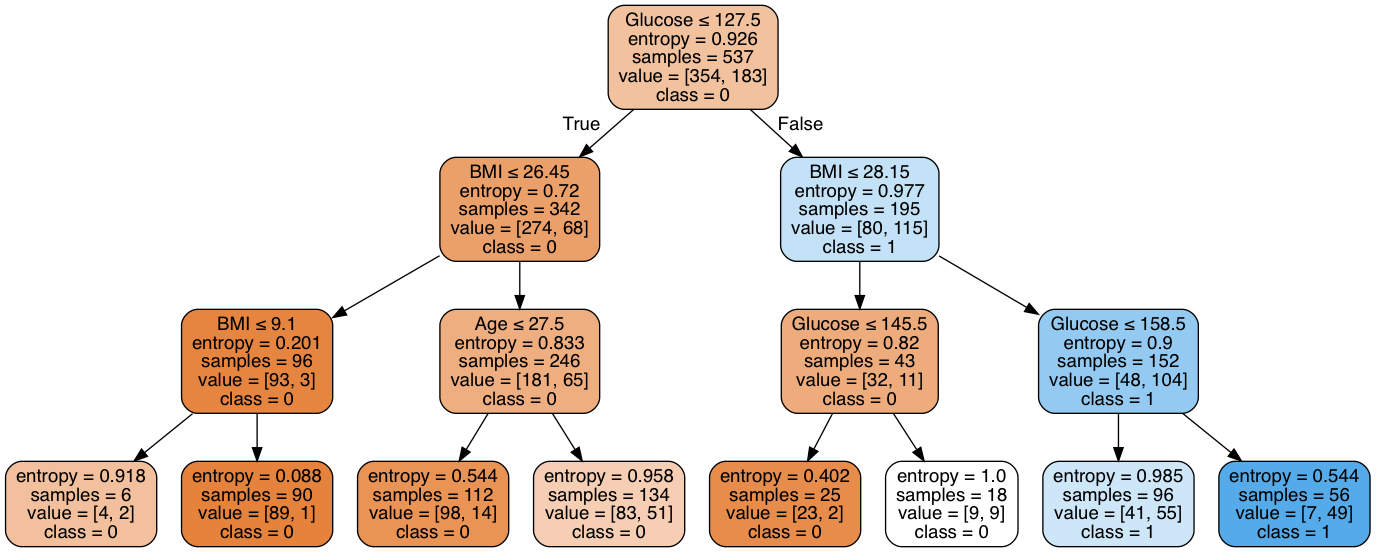

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=170)
clf_random_forest.fit(X_train, y_train)
y_pred = clf_random_forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8008658008658008


In [71]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6320346320346321


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1) # 70% training and 30% test
from sklearn.svm import SVC
clf_svm = SVC(C=5)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
X_train

array([[ 3.31264542,  0.26222798,  0.64823013, ...,  0.47275805,
         0.04624525, -0.96304428],
       [-1.14185152,  0.17539902,  0.61015436, ..., -0.74783062,
        -0.26394125,  0.38694877],
       [-0.84488505, -0.69289057, -0.58288655, ..., -0.15318486,
         0.04624525, -0.80901822],
       ...,
       [ 2.7187125 , -0.69289057,  1.44782138, ...,  0.1597866 ,
         1.08020025,  0.33560676],
       [ 0.04601433, -0.69289057,  1.47320522, ...,  1.56815814,
         0.14964075,  0.02151441],
       [ 1.53084665, -0.69289057,  0.1151693 , ..., -0.59134489,
         0.35643175,  0.58325649]])

In [53]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression()
clf_logistic = clf_logistic.fit(X_train, y_train)
y_pred = clf_logistic.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
!pwd

/Users/manishanker.talusani/Desktop/Learnbay_sep19/jupyter_notebooks
